# NLP For Drugs.com Data Set

### Packages Import

In [273]:
### Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.color_palette("Blues", as_cmap=True)

### Standard Packages
import numpy as np
import warnings
import nltk
import re
import pandas as pd
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

### NLTK
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
nltk.download('vader_lexicon')
import contractions

### Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, \
                            accuracy_score, f1_score, recall_score, precision_score

### ImbLearn
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/albertcc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/albertcc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Bringing in two .tsv files as test and train

In [274]:
data_test = pd.read_csv('data/drugsComTest_raw.tsv', sep='\t')

In [275]:
# Drop first column since these appear to be entry numbers
data_test = data_test.drop(data_test.columns[0],axis=1)

In [276]:
data_test.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.""",10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done very well on the Asacol. He has no complaints and shows no side effects. He has taken as many as nine tablets per day at one time. I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically.""",8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few days, I don&#039;t know if I&#039;ve lost weight (I don&#039;t have a scale), but my clothes do feel a little looser, so maybe a pound or two. I&#039;m hoping that after a few months on this medication, I will develop healthier habits that I can continue without the aid of Contrave.""",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend""",9.0,"October 22, 2015",4


In [277]:
data_train = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')

In [278]:
# Drop the first column as these appear to be just entrie numbers
data_train = data_train.drop(data_train.columns[0],axis=1)

In [279]:
data_train.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9.0,"November 27, 2016",37


In [280]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     161297 non-null  object 
 1   condition    160398 non-null  object 
 2   review       161297 non-null  object 
 3   rating       161297 non-null  float64
 4   date         161297 non-null  object 
 5   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 7.4+ MB


- Noticed how 'condition' has some missing values, but other columns are fine

In [281]:
# Drop null values that are in 'condition'

data_train = data_train.dropna(subset=['condition'])

In [282]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160398 entries, 0 to 161296
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     160398 non-null  object 
 1   condition    160398 non-null  object 
 2   review       160398 non-null  object 
 3   rating       160398 non-null  float64
 4   date         160398 non-null  object 
 5   usefulCount  160398 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 8.6+ MB


- Reduces the training dataset to 160,398 values

In [283]:
data_train['condition'].value_counts()

Birth Control                              28788
Depression                                  9069
Pain                                        6145
Anxiety                                     5904
Acne                                        5588
                                           ...  
Pruritus of Partial Biliary Obstruction        1
Mumps Prophylaxis                              1
Mycoplasma Pneumonia                           1
Strongyloidiasis                               1
Acetaminophen Overdose                         1
Name: condition, Length: 884, dtype: int64

### Looking at unique drugs under 'Birth Control' condition

In [284]:
data_train['drugName'][data_train['condition'] =='Birth Control'].nunique()

172

In [285]:
data_train['drugName'][data_train['condition'] =='Birth Control'].value_counts()

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
                                      ... 
Briellyn                                 1
Jencycla                                 1
Lillow                                   1
Amethia Lo                               1
Microgestin 1.5 / 30                     1
Name: drugName, Length: 172, dtype: int64

In [286]:
# Select the the top 7 birth controls since we want to focus on these
bc_drugs = ['Etonogestrel', 'Ethinyl estradiol / norethindrone', 'Nexplanon', 'Levonorgestrel', 'Ethinyl estradiol / levonorgestrel',
           'Ethinyl estradiol / norgestimate', 'Implanon']

bc_data_train = data_train[data_train['drugName'].isin(bc_drugs)]

In [287]:
bc_data_train.head()

,drugName,condition,review,rating,date,usefulCount
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.""",1.0,"March 7, 2017",5
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.""",8.0,"December 8, 2016",1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed.""",3.0,"August 7, 2014",10
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free sex. The only thing is that my periods are sometimes light and sometimes heavy. Sometimes they go away and sometimes they show up unexpected. I also feel somewhat depressed. Not sure if its Nexplanon or not. I&#039;ve had Nexplanont for about 2 months now, but despite the side effects its the most effective birth control I&#039;ve ever used and I do not plan on taking it out.""",9.0,"August 11, 2014",11
59,Implanon,Birth Control,"""Never again! After being on depo I was suppose to b an ideal candidate the first 6 months was ok bit moody but fine no weight gain but then something changed I was constantly bleeding and getting horrible hormone spots I normally have clear skin mood swings were increasing. After 14 months I decided to have it taken out and that was an ordeal they can b very tricky for the doc remove. So 3 anesthetics and a few stitches later its out. It&#039;s simply not worth the hassle""",2.0,"August 20, 2015",1


In [288]:
bc_data_train['drugName'].value_counts()

Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Implanon                              1102
Name: drugName, dtype: int64

- Wanted to only include in our dataset the top 7 drugs with condition = birth control, however when we filtered for these drugs we see additional conditions were selected

In [289]:
bc_data_train['condition'].value_counts()

Birth Control                                 14204
Emergency Contraception                        1221
Abnormal Uterine Bleeding                       617
Acne                                            344
Endometriosis                                   137
Menstrual Disorders                              93
Ovarian Cysts                                    74
Polycystic Ovary Syndrome                        71
Not Listed / Othe                                14
Premenstrual Syndrome                             8
0</span> users found this comment helpful.        5
Postmenopausal Symptoms                           5
2</span> users found this comment helpful.        3
8</span> users found this comment helpful.        2
4</span> users found this comment helpful.        1
9</span> users found this comment helpful.        1
1</span> users found this comment helpful.        1
3</span> users found this comment helpful.        1
Name: condition, dtype: int64

In [290]:
# Let's try to get rid of these conditions that took in the 'Useful' rating as 'condition'
bc_data_train = bc_data_train[~bc_data_train['condition'].str.contains('comment')]

In [291]:
bc_data_train['condition'].value_counts()

Birth Control                14204
Emergency Contraception       1221
Abnormal Uterine Bleeding      617
Acne                           344
Endometriosis                  137
Menstrual Disorders             93
Ovarian Cysts                   74
Polycystic Ovary Syndrome       71
Not Listed / Othe               14
Premenstrual Syndrome            8
Postmenopausal Symptoms          5
Name: condition, dtype: int64

In [292]:
bc_data_train['drugName'].value_counts()

Levonorgestrel                        3631
Etonogestrel                          3321
Ethinyl estradiol / norethindrone     2750
Nexplanon                             2149
Ethinyl estradiol / norgestimate      2033
Ethinyl estradiol / levonorgestrel    1809
Implanon                              1095
Name: drugName, dtype: int64

In [293]:
bc_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16788 entries, 6 to 161273
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   drugName     16788 non-null  object 
 1   condition    16788 non-null  object 
 2   review       16788 non-null  object 
 3   rating       16788 non-null  float64
 4   date         16788 non-null  object 
 5   usefulCount  16788 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 918.1+ KB


In [294]:
# Create new column called 'labels' that will have the target variables
bc_data_train['sentiment'] = ['Positive' if x > 7.0 else 'Neutral' if 4.0 <= x <= 7.0 else 'Negative' for x in bc_data_train['rating']]

### Analyze the median rating based on condition

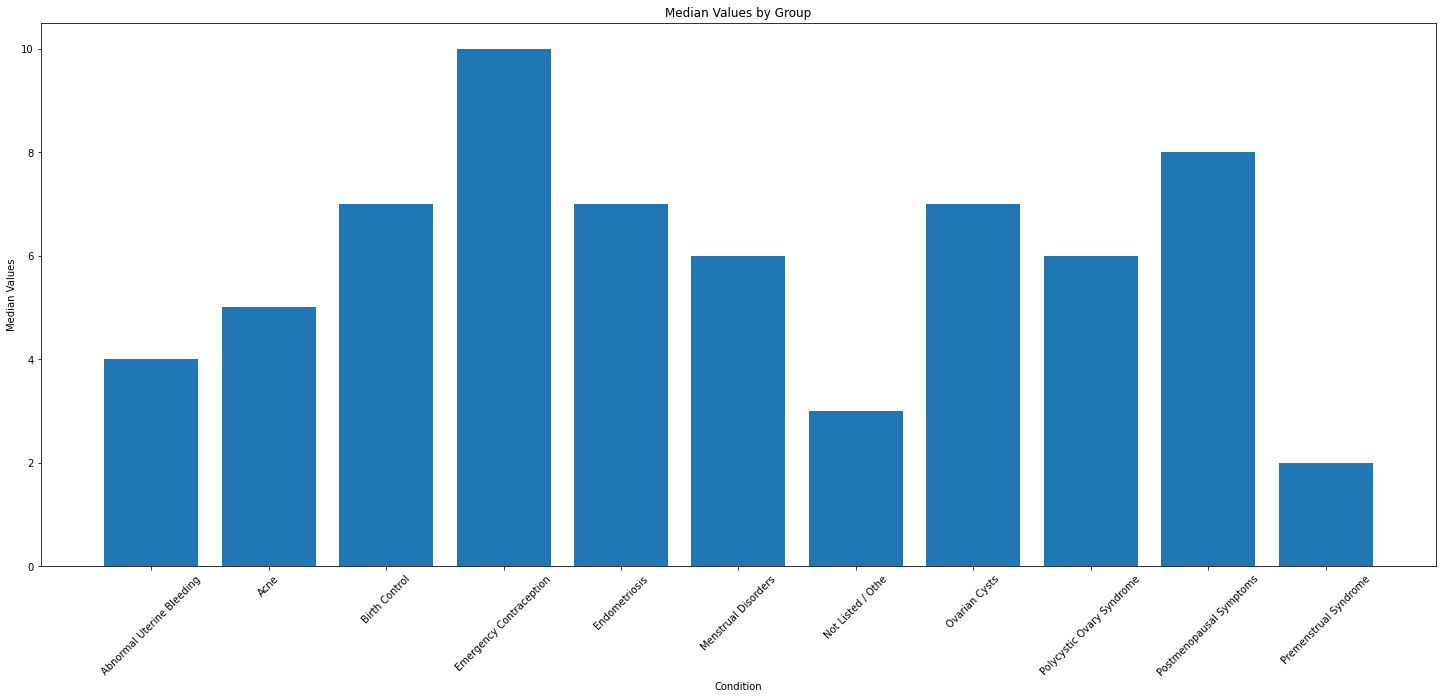

In [295]:
median_values = bc_data_train.groupby('condition')['rating'].median()

# Create bar chart
fig, ax = plt.subplots(figsize = (25, 10))
ax.bar(median_values.index, median_values.values)
plt.xticks(rotation=45)

# Set axis labels and title
ax.set_xlabel('Condition')
ax.set_ylabel('Median Values')
ax.set_title('Median Values by Group')

# Show plot
plt.show()

In [296]:
bc_data_train.loc[bc_data_train['condition'] == 'Emergency Contraception'].rating.value_counts()

10.0    756
9.0     164
1.0     114
8.0      78
7.0      29
5.0      29
6.0      23
3.0      11
4.0       9
2.0       8
Name: rating, dtype: int64

### Create columns that count emphasis and capital letters in text, as this could express sentiment

In [297]:
### Creating a 'punc_emphasis' column that scores how many exclamation points and question marks are in the text

bc_data_train['punc_emphasis'] = bc_data_train['review'].apply(lambda x: sum([1 for char in x if char in ['!', '?']]))

### Creating a 'capt_emphasis' column that scores how many capitalized words are in the text

bc_data_train['capt_emphasis'] = bc_data_train['review'].apply(lambda x: sum([1 for word in x.split() if word.isupper()]))

In [298]:
bc_data_train.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,punc_emphasis,capt_emphasis
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.""",1.0,"March 7, 2017",5,Negative,0,2
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.""",8.0,"December 8, 2016",1,Positive,0,13
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed.""",3.0,"August 7, 2014",10,Negative,1,7
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free sex. The only thing is that my periods are sometimes light and sometimes heavy. Sometimes they go away and sometimes they show up unexpected. I also feel somewhat depressed. Not sure if its Nexplanon or not. I&#039;ve had Nexplanont for about 2 months now, but despite the side effects its the most effective birth control I&#039;ve ever used and I do not plan on taking it out.""",9.0,"August 11, 2014",11,Positive,0,3
59,Implanon,Birth Control,"""Never again! After being on depo I was suppose to b an ideal candidate the first 6 months was ok bit moody but fine no weight gain but then something changed I was constantly bleeding and getting horrible hormone spots I normally have clear skin mood swings were increasing. After 14 months I decided to have it taken out and that was an ordeal they can b very tricky for the doc remove. So 3 anesthetics and a few stitches later its out. It&#039;s simply not worth the hassle""",2.0,"August 20, 2015",1,Negative,1,4


### Sentiment Analysis Against Condition

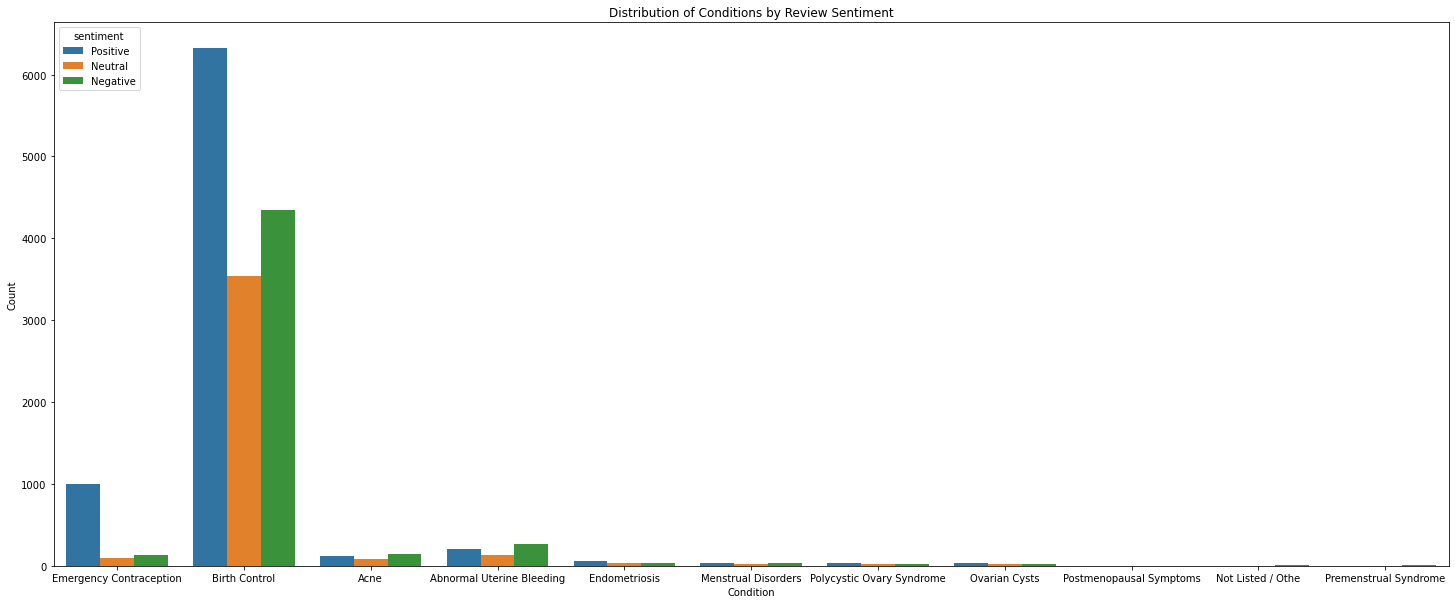

In [299]:
# Let's try plotting sentiment against groups

fig = plt.figure(figsize = (25, 10))

hue_order = ['Positive', 'Neutral', 'Negative']
sns.countplot(x='condition', hue='sentiment', data=bc_data_train, hue_order=hue_order, palette='tab10')

# plt.xticks(rotation=45)

plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Distribution of Conditions by Review Sentiment');

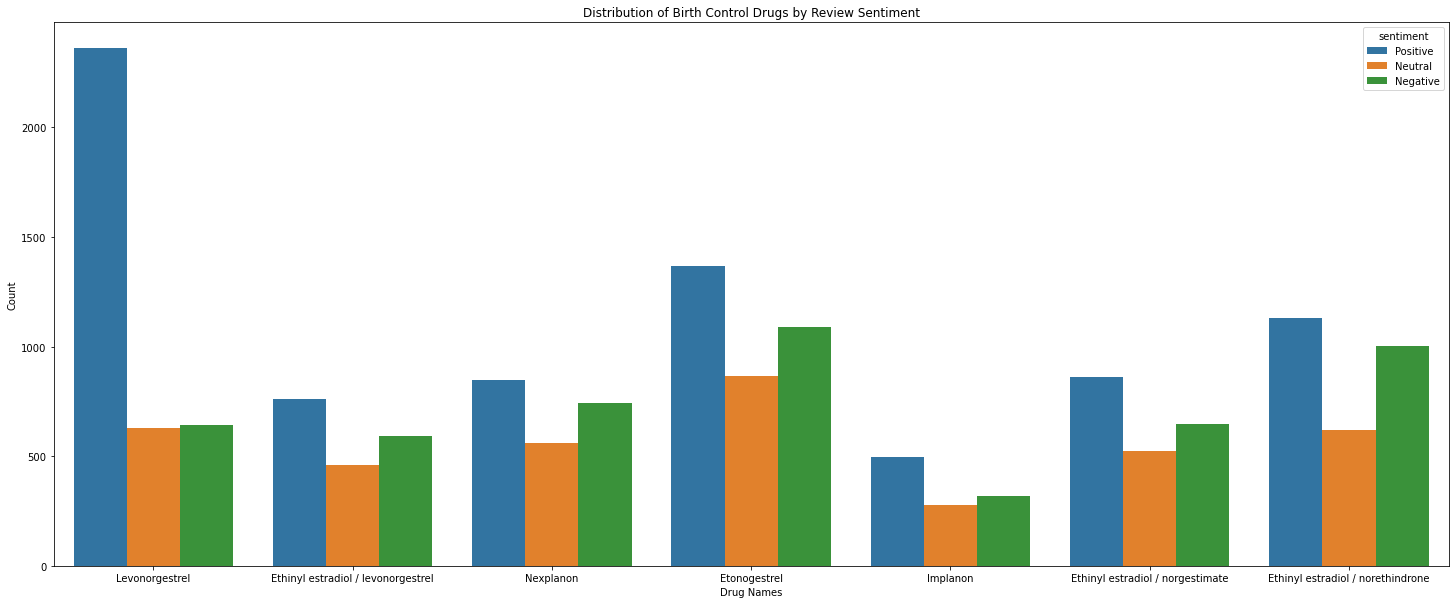

In [300]:
# Let's try plotting sentiment against groups

fig = plt.figure(figsize = (25, 10))


sns.countplot(x='drugName', hue='sentiment', data=bc_data_train, hue_order=hue_order, palette='tab10')

# plt.xticks(rotation=45)
hue_order = ['Positive', 'Neutral', 'Negative']
plt.xlabel('Drug Names')
plt.ylabel('Count')
plt.title('Distribution of Birth Control Drugs by Review Sentiment');

### Can we do anything with 'UsefulCount'?

In [301]:
bc_data_train['usefulCount'].value_counts(bins=3)

(-1.248, 415.667]     16784
(415.667, 831.333]        3
(831.333, 1247.0]         1
Name: usefulCount, dtype: int64

In [302]:
bc_data_train['usefulCount'].min()

0

In [303]:
bc_data_train['usefulCount'].describe()

count    16788.000000
mean         7.798725
std         17.630239
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max       1247.000000
Name: usefulCount, dtype: float64

### After research on birth controls, wanted to read what reviews are saying

In [304]:
bc_data_train[bc_data_train['drugName'] == 'Levonorgestrel']

,drugName,condition,review,rating,date,usefulCount,sentiment,punc_emphasis,capt_emphasis
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.""",1.0,"March 7, 2017",5,Negative,0,2
83,Levonorgestrel,Birth Control,"""I had the Mirena put in almost a year ago. Insertion was a breeze next to no cramping. My periods have remained heavy and do not show signs of stopping. Have gained about 30 pounds have acne and headaches and backache, so now I am wondering what is next. My doctor would not take it out and wanted me to remain on it for a year. It is almost a year so I am finding a new doctor and getting it taken out.""",1.0,"January 18, 2010",10,Negative,0,3
113,Levonorgestrel,Birth Control,"""My time with skyla has been an absolute breeze. Ms. Skyla and i have been together since late october 2015 and it has been great. I must admit that the insertion is a bit painful,but you will soon forget. I got cramps for about a weekafter insertion. Nothing that a littlw ibuprofen couldnt tackle. I urge anyone who is thinking about skyla to just do it. I promise it is worth it. Please remember that pain is subjective. Meaning it just depends on the person. """,10.0,"July 14, 2016",1,Positive,0,4
139,Levonorgestrel,Birth Control,"""I&#039;m 27 w/ two kids. After my second child was born in 2008 I suffered from almost daily tension/migraine headaches. I wanted to try Mirena as a solution to birth control and possibly help my headaches. After 4 months my headaches are slightly better but I have had some noticeable side effects; 10-15 lbs weight gain, increased discharge, longer periods, and cramping after sex or exercise. """,2.0,"June 26, 2011",2,Negative,0,3
144,Levonorgestrel,Birth Control,"""Had the Liletta inserted in November. The process overall wasn&#039;t bad, but I also had numbing injections which helped so much with the pain. Just a couple cramps and it was over. Stopped having a period after three months, and the weird cramps I kept feeling stopped around 5 months. Everything was great until I noticed my clothes weren&#039;t fitting anymore. I&#039;ve gained 10 - 12 pounds despite months of a very clean diet, counting calories, and frequent exercise. I also started losing my hair a few weeks ago, and began sprouting chin hair that I didn&#039;t have before, which is making me feel very depressed. I am beyond frustrated and am having it removed in a few days.""",3.0,"May 24, 2017",4,Negative,0,6
...,...,...,...,...,...,...,...,...,...
161156,Levonorgestrel,Birth Control,"""I had Skyla placed in May. I have gained about 20lbs since then, which sucks. I&#039;m not good with birth control pills so I guess I&#039;m stuck with the weight gain.""",6.0,"September 18, 2016",5,Neutral,0,3
161161,Levonorgestrel,Emergency Contraception,"""I had unprotected sex August 29 which was a Monday and after we finished he told me that he came inside me, and let me tell y&#039;all I was fertile and i ovulated on Wednesday!! Well I started freaking out and took the pill 40 min after. Tuesday morning I did feel some of the side effects but nothing too major!! Your period is either going to be early or late but i wasn&#039;t supposed to get my period until 2 weeks from the day I had sex. Fortunately I got it early six days later so it does work!! Also they say that if you weigh more then 160 or so it won&#039;t be as effective and well I&#039;m a pretty curvy girl I weigh 250 and it worked on me so Don&#039;t believe that stupid theory!!! Hope it was helpful!!""",10.0,"September 16, 2016",15,Positive,11,7
161165,Levonorgestrel,Birth Control,"""I had my Mirena in for a year and half and just had it removed because my husband and I want another child. Insertion was uncomfortable but removal was way worse. I went in thinking that removal was going to be this quick painless thing, but that did not happen. The doctor could not locat

### Binning the years these reviews were written into two groups to see if there's a difference over time

In [305]:
bc_data_train['date'] = pd.to_datetime(bc_data_train['date'])

In [306]:
bc_data_train['date'].describe()

count                   16788
unique                   2872
top       2017-02-23 00:00:00
freq                       27
first     2008-03-06 00:00:00
last      2017-12-11 00:00:00
Name: date, dtype: object

In [307]:
bc_data_train['date'].value_counts(bins=2)

(2013-01-22 12:00:00, 2017-12-11]                       13723
(2008-03-02 10:23:31.199999999, 2013-01-22 12:00:00]     3065
Name: date, dtype: int64

In [308]:
# Create new column called 'date_column' that will have grouped time ranges of 2008-2012 and 2013-2017
bc_data_train['date_column'] = ['2013-2017' if x.year > 2013 else '2008-2012' for x in bc_data_train['date']]

In [309]:
bc_data_train.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,punc_emphasis,capt_emphasis,date_column
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.""",1.0,2017-03-07,5,Negative,0,2,2013-2017
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.""",8.0,2016-12-08,1,Positive,0,13,2013-2017
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed.""",3.0,2014-08-07,10,Negative,1,7,2013-2017
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free sex. The only thing is that my periods are sometimes light and sometimes heavy. Sometimes they go away and sometimes they show up unexpected. I also feel somewhat depressed. Not sure if its Nexplanon or not. I&#039;ve had Nexplanont for about 2 months now, but despite the side effects its the most effective birth control I&#039;ve ever used and I do not plan on taking it out.""",9.0,2014-08-11,11,Positive,0,3,2013-2017
59,Implanon,Birth Control,"""Never again! After being on depo I was suppose to b an ideal candidate the first 6 months was ok bit moody but fine no weight gain but then something changed I was constantly bleeding and getting horrible hormone spots I normally have clear skin mood swings were increasing. After 14 months I decided to have it taken out and that was an ordeal they can b very tricky for the doc remove. So 3 anesthetics and a few stitches later its out. It&#039;s simply not worth the hassle""",2.0,2015-08-20,1,Negative,1,4,2013-2017


### Can we see the difference in reviews of these drugs over time?

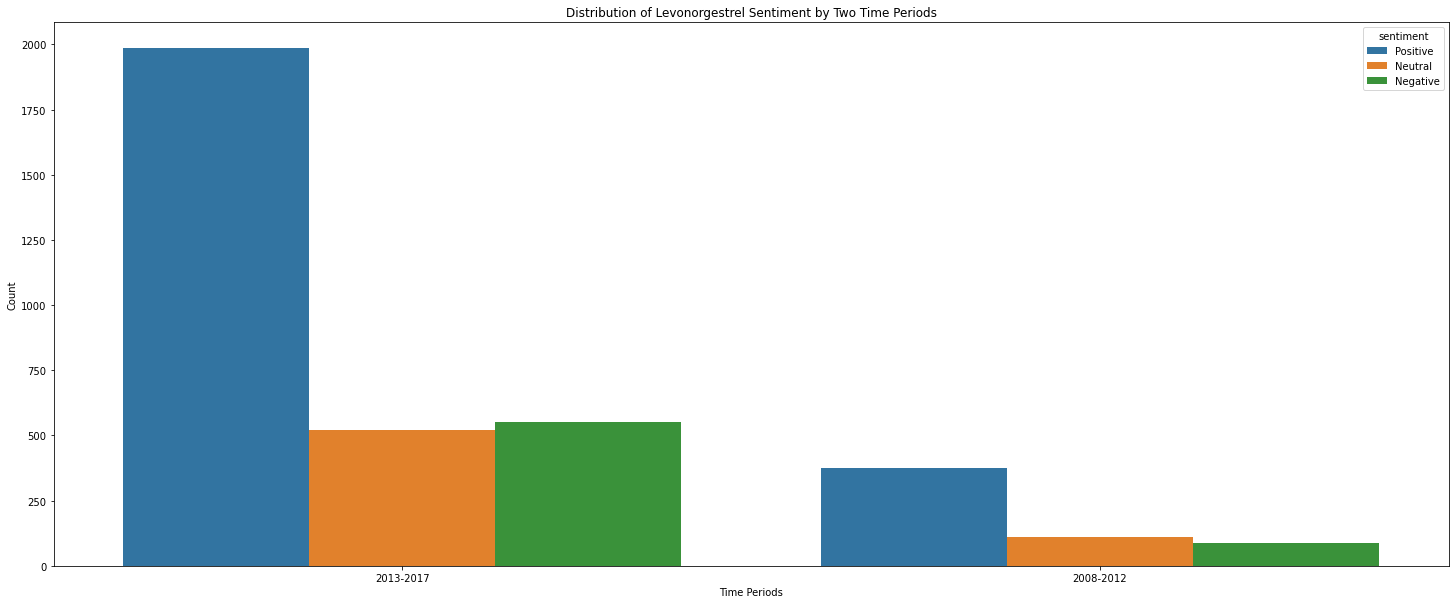

In [310]:
# Let's try plotting sentiment of Levonorgestrel against the two assigned time periods

fig = plt.figure(figsize = (25, 10))

sns.countplot(x='date_column', hue='sentiment', data=bc_data_train[bc_data_train['drugName'] == 'Levonorgestrel'], hue_order=hue_order, palette='tab10')

hue_order = ['Positive', 'Neutral', 'Negative']
# plt.xticks(rotation=45)
plt.xlabel('Time Periods')
plt.ylabel('Count')
plt.title('Distribution of Levonorgestrel Sentiment by Two Time Periods');

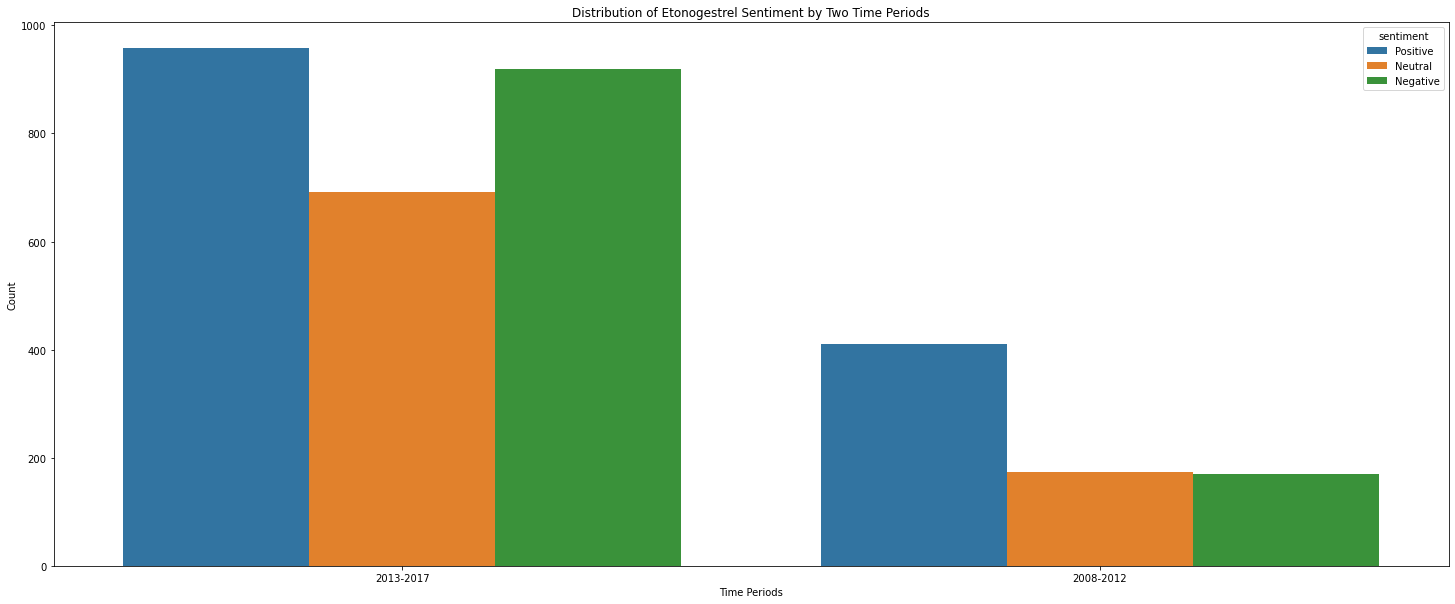

In [311]:
# Let's try plotting sentiment of Etonogestrel against the two assigned time periods

fig = plt.figure(figsize = (25, 10))

sns.countplot(x='date_column', hue='sentiment', data=bc_data_train[bc_data_train['drugName'] == 'Etonogestrel'], hue_order=hue_order, palette='tab10')

hue_order = ['Positive', 'Neutral', 'Negative']
# plt.xticks(rotation=45)
plt.xlabel('Time Periods')
plt.ylabel('Count')
plt.title('Distribution of Etonogestrel Sentiment by Two Time Periods');

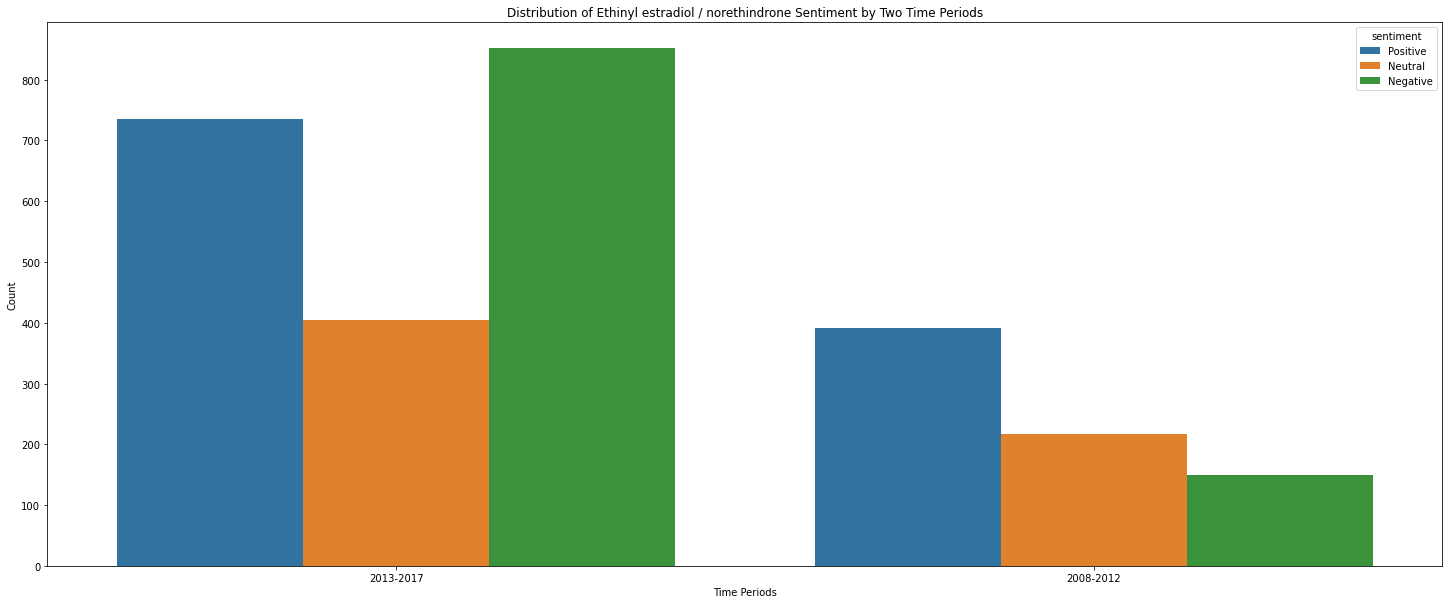

In [312]:
# Let's try plotting sentiment of Ethinyl estradiol / norethindrone against the two assigned time periods

fig = plt.figure(figsize = (25, 10))

sns.countplot(x='date_column', hue='sentiment', data=bc_data_train[bc_data_train['drugName'] == 'Ethinyl estradiol / norethindrone'], hue_order=hue_order, palette='tab10')

hue_order = ['Positive', 'Neutral', 'Negative']
# plt.xticks(rotation=45)
plt.xlabel('Time Periods')
plt.ylabel('Count')
plt.title('Distribution of Ethinyl estradiol / norethindrone Sentiment by Two Time Periods');

### Cleaning Text Reviews

In [313]:
# Create function that will lowercase the text

def lower_case(text):
    text = text.lower()
    return text

# Create function to remove the html apostrophes in the text

def apostrophe(text):
    text = text.replace('&#039;', '\'')
    return text

# Want to expand the contractions so we can see if these words have importance

def fixcontractions(text):
    text = contractions.fix(text)
    return text

# Create a function that uses a regex tokenizer to remove punctuation but ignores contraction apostrophes

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+\'?\w+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text

# Remove stopwords from the reviews

def remove_stopwords(text, stop_words_list = set(stopwords.words('english'))):
    text = text.split()
    text = [word for word in text if word not in stop_words_list]
    text = ' '.join(text)
    return text

# Create a function that lemmatizes words

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

def clean_text(text):
    text = lower_case(text)
    text = apostrophe(text)
    text = fixcontractions(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text

In [314]:
# Manually testing the contractions.fix function
contractions.fix("I've aren't Tim's got a lovely bunch of coconuts")

"I have are not Tim's got a lovely bunch of coconuts"

In [315]:
# Original review text location 6
bc_data_train['review'][6]

'"He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant."'

In [316]:
# Testing one of the reviews to see what it is doing to the text, as above
clean_text(bc_data_train['review'][6])

'pulled cummed bit took plan 26 hour later took pregnancy test two week later pregnant'

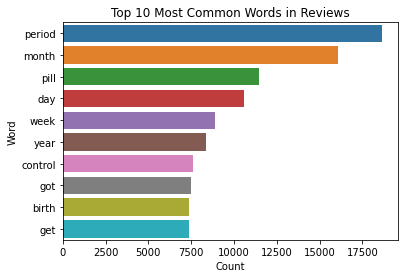

In [317]:
### Plotting the top 10 most common words in the 'text' column in an sns bar chart after applying the clean_text function

text = ' '.join(bc_data_train['review'])
text = clean_text(text)
text = text.split()

freq = pd.Series(text).value_counts()[:10]
freq = freq.to_frame()
freq = freq.reset_index()
freq.columns = ['word', 'count']
freq = freq.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(6,4))
sns.barplot(x='count', y='word', data=freq, palette='tab10')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 10 Most Common Words in Reviews')
plt.show()

# Modeling

### First Simple Model - Count Vectorizer / Logistic Regression / No Features

In [318]:
X1 = bc_data_train['review']
y1 = bc_data_train['sentiment']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1337)

# For Train Set, apply clean_text function

X_train_1 = X_train_1.apply(clean_text)

### Train - Tokenize the training data with a simple split of words, and then flattening to prepare for vectorization

X_train_1 = X_train_1.apply(lambda x: x.split())
X_train_1 = X_train_1.map(' '.join)

### Train - Vectorize the training data using CountVectorizer

cv = CountVectorizer()
X_train_1 = cv.fit_transform(X_train_1)

### Train - Fit training data to Logistic Regression Model

logit = LogisticRegression()
logit.fit(X_train_1, y_train_1)

### VALIDATION - Perform a cross validation on the decision tree classifier

scores = cross_val_score(logit, X_train_1, y_train_1, cv=5)
print('Cross Validation Scores: ', scores)
print('Mean Cross Validation Score: ', scores.mean())

Cross Validation Scores:  [0.70141474 0.71072226 0.69769173 0.70551005 0.70588235]
Mean Cross Validation Score:  0.7042442293373046


In [319]:
# Logistic Regression Test Set Preprocessing
X_test_1 = X_test_1.apply(clean_text)
X_test_1 = X_test_1.apply(lambda x: x.split())
X_test_1 = X_test_1.map(' '.join)
X_test_1 = cv.transform(X_test_1)

In [320]:
logit_pred = logit.predict(X_test_1)

In [321]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test_1, logit_pred))
print('Logistic Regression F1 Score: ', f1_score(y_test_1, logit_pred, average='weighted'))
print('Logistic Regression Precision Score: ', precision_score(y_test_1, logit_pred, average='weighted'))
print('Logistic Regression Recall Score: ', recall_score(y_test_1, logit_pred, average='weighted'))

Logistic Regression Accuracy:  0.7078618225134008
Logistic Regression F1 Score:  0.7037292534375945
Logistic Regression Precision Score:  0.7013036007986146
Logistic Regression Recall Score:  0.7078618225134008


### Second Model - TFID Vectorizer / Logistic Regression / No Features¶

- Want to test if TFIDF Vectorizer makes a difference compared to Count Vectorizer

In [322]:
X1_tfidf = bc_data_train['review']
y1_tfidf = bc_data_train['sentiment']

X_train_1_tfidf, X_test_1_tfidf, y_train_1_tfidf, y_test_1_tfidf = train_test_split(X1, y1, test_size=0.2, random_state=1337)

# For Train Set, apply clean_text function

X_train_1_tfidf = X_train_1_tfidf.apply(clean_text)

### Train - Tokenize the training data with a simple split of words, and then flattening to prepare for vectorization

X_train_1_tfidf = X_train_1_tfidf.apply(lambda x: x.split())
X_train_1_tfidf = X_train_1_tfidf.map(' '.join)

### Train - Vectorize the training data using CountVectorizer

tfidf = TfidfVectorizer()
X_train_1_tfidf = tfidf.fit_transform(X_train_1_tfidf)

### Train - Fit training data to Logistic Regression Model

logit_tfidf = LogisticRegression()
logit_tfidf.fit(X_train_1_tfidf, y_train_1_tfidf)

### VALIDATION - Perform a cross validation on the decision tree classifier

scores = cross_val_score(logit_tfidf, X_train_1_tfidf, y_train_1_tfidf, cv=5)
print('Cross Validation Scores: ', scores)
print('Mean Cross Validation Score: ', scores.mean())

Cross Validation Scores:  [0.71221147 0.71742368 0.70104244 0.70178704 0.70699926]
Mean Cross Validation Score:  0.7078927773641102
